In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

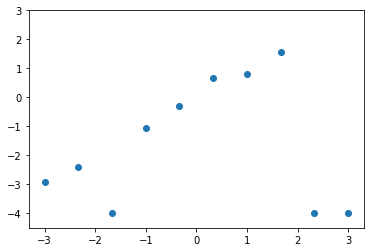

In [13]:
n, N = 10, 1000
x = np.linspace(-3, 3, n)
X = np.linspace(-4, 4, N)
# print('x', x)
# print('X', X.shape)
np.random.seed(5)
y = x + 0.2 * np.random.normal(size=n)
y[2], y[n -2], y[n - 1] = [-4] * 3

plt.scatter(x, y)
axes = plt.gca()
axes.set_ylim([-4.5, 3])
plt.show()

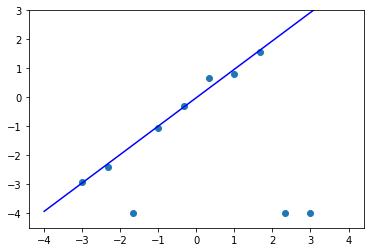

In [41]:
n, N = 10, 1000
x = np.linspace(-3, 3, n)
X = np.linspace(-4, 4, N)

# Original data
np.random.seed(5)
y = x + 0.2 * np.random.normal(size=n)
y[2], y[n -2], y[n - 1] = [-4] * 3

# Tukey Regression
Phi = np.array([[1, x[i]] for i in range(n)])
thetas = np.random.normal(1, 0.1, 2)
ETA = 2
def w_tukey(r):
    return (1 - (r**2)/(ETA**2))**2 if np.absolute(r) <= ETA else 0
# Iteration
for step in range(20):
    errors = y - np.matmul(Phi, thetas)
    _W = np.diag([w_tukey(err) for err in errors])
    Q = Phi.T @ _W @ Phi
    if np.linalg.det(Q) == 0:
        break
    thetas = np.linalg.inv(Q) @ Phi.T @ _W @ y

# Prediction
def pred(x):
    return thetas[0] + thetas[1] * x
    
plt.scatter(x, y)
plt.plot(X, pred(X), 'b-')
axes = plt.gca()
axes.set_ylim([-4.5, 3])
plt.show()